In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("uber_nyc_enriched.csv")
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [4]:
holiday = df.groupby(["hday","borough"])["pickups"].sum()
holidays = df["hday"].value_counts()    # count the number of holidays vs non-holidays
holi_yes = holiday["Y"]                 # number of pickups by borough on holidays
holi_no = holiday["N"]                  # number of pickups by borough on non-holidays
holi_yes_sum = holi_yes.sum()           # sum number of pickups on holidays
holi_no_sum = holi_no.sum()             # sum number of pickups on non-holidays

holi_yes_ratio = holi_yes_sum / holidays["Y"]    # ratio of 
holi_no_ratio = holi_no_sum / holidays["N"]

([<matplotlib.patches.Wedge at 0x1ceac7635f8>,
 [Text(3.296139829552402, 0.1595688692642183, 'Bronx'),
  Text(2.7119689102795657, 1.880219303612498, 'Brooklyn'),
  Text(1.450475184646472, 2.9641392913837206, 'EWR'),
  Text(-3.2742887585427014, -0.8781418596564551, 'Manhattan'),
  Text(3.1551638719941324, -0.9669234410557008, 'Queens'),
  Text(3.2999961363838297, -0.005049737794912349, 'Staten Island')],
 [Text(1.7978944524831282, 0.08703756505320996, '1.5%'),
  Text(1.4792557692433992, 1.025574165606817, '16.2%'),
  Text(0.7911682825344392, 1.6168032498456655, '0.0%'),
  Text(-1.8254884229043378, -0.4895835146757226, '72.8%'),
  Text(1.7209984756331627, -0.5274127860303822, '9.4%'),
  Text(1.7999978925729978, -0.0027544024335885535, '0.0%')])

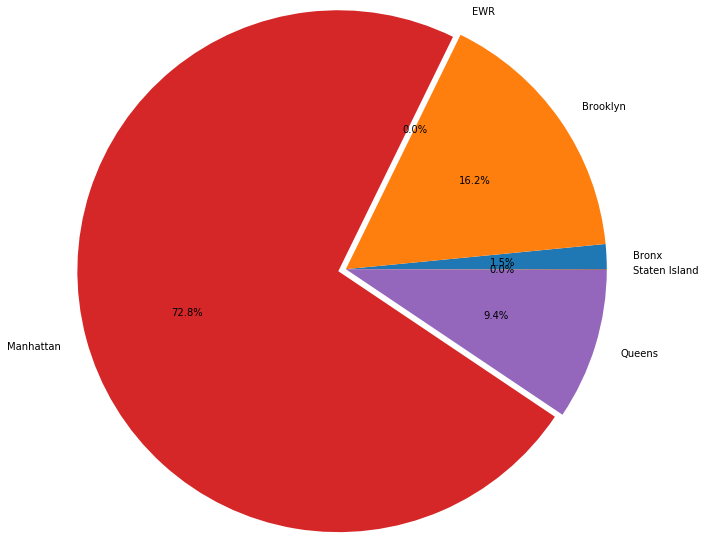

In [5]:
# pie chart of non-holiday Uber distribution by borough
labels = ["Bronx", "Brooklyn", "EWR", "Manhattan", "Queens", "Staten Island"]
explode = [0,0,0,0.09,0,0]
plt.pie(holi_no, explode=explode,  labels = labels, autopct = "%1.1f%%", radius = 3)

([<matplotlib.patches.Wedge at 0x1ceac985710>,
 [Text(3.2956282469747165, 0.1698071192334348, 'Bronx'),
  Text(2.591933870930766, 2.0425177621557804, 'Brooklyn'),
  Text(1.0971259575608165, 3.112284471774112, 'EWR'),
  Text(-3.266411534204188, -0.9070036875436851, 'Manhattan'),
  Text(3.103630359270148, -1.1213735296575587, 'Queens'),
  Text(3.2999957583541515, -0.005291015461193685, 'Staten Island')],
 [Text(1.7976154074407542, 0.09262206503641897, '1.6%'),
  Text(1.4137821114167812, 1.1141005975395164, '18.0%'),
  Text(0.5984323404877181, 1.697609711876788, '0.0%'),
  Text(-1.8210966960607418, -0.5056746222588686, '69.4%'),
  Text(1.692889286874626, -0.6116582889041228, '10.9%'),
  Text(1.7999976863749914, -0.002886008433378373, '0.1%')])

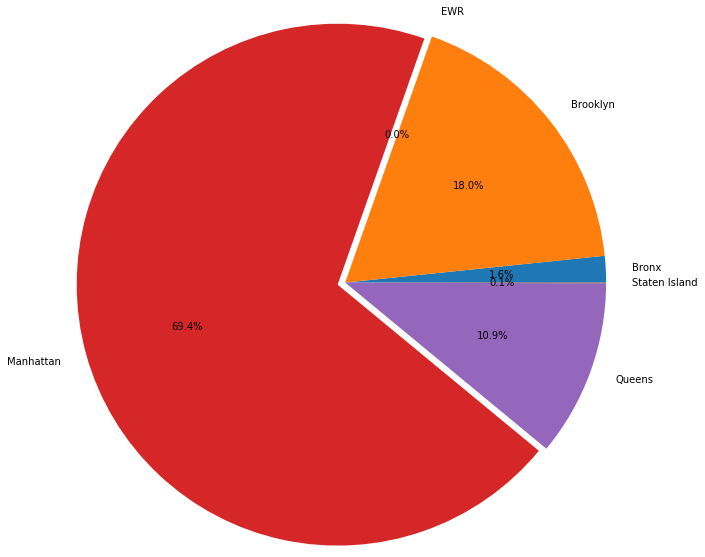

In [6]:
# pie chart of holidays Uber usage distribution
labels = ["Bronx", "Brooklyn", "EWR", "Manhattan", "Queens", "Staten Island"]
explode = [0,0,0,0.09,0,0]
plt.pie(holi_yes, explode=explode,  labels = labels, autopct = "%1.1f%%", radius = 3)

([<matplotlib.axis.XTick at 0x1ceac9c98d0>,
 <a list of 6 Text xticklabel objects>)

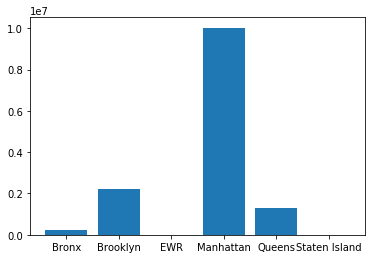

In [7]:
# bar chart of non-holiday Uber usage by borough
x_axis = np.arange(len(holi_no))
plt.bar(x_axis, holi_no)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "EWR", "Manhattan", "Queens", "Staten Island"])

([<matplotlib.axis.XTick at 0x1ceaca410f0>,
 <a list of 6 Text xticklabel objects>)

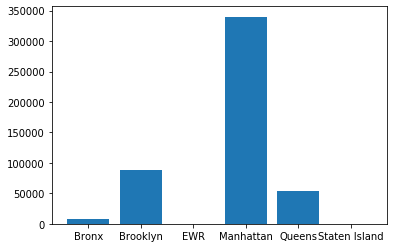

In [8]:
# bar chart of holiday Uber usage by borough
x_axis = np.arange(len(holi_yes))
plt.bar(x_axis, holi_yes)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "EWR", "Manhattan", "Queens", "Staten Island"])

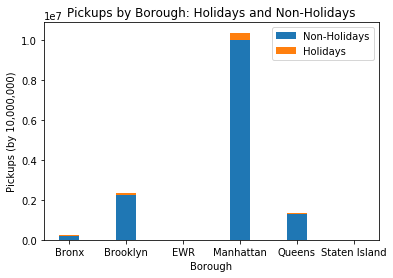

In [12]:
# stacked bar chart
p1 = plt.bar(x_axis, holi_no, width = .35)
p2 = plt.bar(x_axis, holi_yes, width = .35, bottom = holi_no)

plt.ylabel("Pickups (by 10,000,000)")
plt.xlabel("Borough")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Bronx", "Brooklyn", "EWR", "Manhattan", "Queens", "Staten Island"])
plt.title("Pickups by Borough: Holidays and Non-Holidays")
plt.legend((p1, p2), ("Non-Holidays", "Holidays"))
plt.show()